In [85]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [86]:
import sys
sys.path.append('/gdrive/My Drive/2nd Sem/IBM/Covid Project/Code/Scraping Twitter Data')

In [87]:
pip install googletrans

In [88]:
import private
import re
import tweepy
import difflib
import pandas as pd
import numpy as np
import pickle
import copy
from googletrans import Translator
import matplotlib.pyplot as plt


from datetime import date

In [55]:
auth = tweepy.OAuthHandler(private.CONSUMER_KEY, private.CONSUMER_SECRET)
auth.set_access_token(private.OAUTH_TOKEN, private.OAUTH_TOKEN_SECRET)
api = tweepy.API(auth)

In [56]:
# tweet_id  = "1275848474987311107"
tweet_id = "1261004897790517248"
tweet = api.get_status(tweet_id,tweet_mode='extended')

In [57]:
def calculate_days_past(tweet_time):
    #Calculating Dates
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    a1 = int(tweet_time[-1])
    b1 = int(months.index(tweet_time[1])+1)
    c1 = int(tweet_time[2])

    #Todays date
    today = date.today()
    life  =  str(date(today.year,today.month,today.day) - date(a1,b1,c1))
    if(len(life)>7):
        life  = life.split(" ")
        life  = life[0]
        life  = int(life)
        return life
    else:
        return 0

In [58]:
def get_user_info(tweet):
    
    tweet_text   = tweet.full_text
    real_name    = tweet._json['user']['name']
    user_handle  = tweet._json['user']['screen_name']
    tweet_id     = tweet._json['id']
    user_id      = tweet._json['user']['id']
    
    user_info = api.get_user(user_id,user_mode='extended')
    desc = user_info._json['description']
    
    try:
        expanded_url = user_info._json['entities']['url']['urls'][0]['expanded_url']
        expanded_url = 1
    except:
        expanded_url = 0

    
    chars_in_desc          = len(desc)
    chars_in_real_name     = len(real_name)
    chars_in_user_handle   = len(user_handle)
    num_matches            = len(difflib.SequenceMatcher(None, real_name,user_handle).get_matching_blocks())
    total_urls_in_desc     = len(user_info._json['entities']['description']['urls'])
    official_url_exists    = expanded_url
    followers_count        = user_info._json['followers_count']
    friends_count          = user_info._json['friends_count']
    listed_count           = user_info._json['listed_count']
    favourites_count       = user_info._json['favourites_count']
    geo_enabled            = int(user_info._json['geo_enabled'])
    acc_created_on         = user_info._json['created_at'].split()
    acc_life               = calculate_days_past(acc_created_on)
    verified               = int(user_info._json['verified'])
    num_tweets             = user_info._json['statuses_count']
    protected              = int(user_info._json['protected'])
    posting_frequency      = num_tweets/acc_life
    latest_tweet_time      = user_info._json['status']['created_at'].split()
    activity               = calculate_days_past(latest_tweet_time)
    avg_likes_per_tweet    = favourites_count/num_tweets
    follower_friends_ratio = followers_count/friends_count
    
    list = [tweet_text, desc, real_name,
            user_handle, user_id, tweet_id,
            chars_in_desc, chars_in_real_name,
            chars_in_user_handle, num_matches,
            total_urls_in_desc, official_url_exists,
            followers_count, friends_count,
            listed_count, favourites_count,
            geo_enabled, acc_created_on,
            acc_life, verified, num_tweets,
            protected, posting_frequency,
            latest_tweet_time, activity,
            avg_likes_per_tweet, follower_friends_ratio]
    
    # for item in list:
        # print(item)
        
    return list

In [59]:
user_info = get_user_info(tweet)

In [247]:
path = r"/gdrive/My Drive/2nd Sem/IBM/Covid Project/Dataset/Infodemic/data/covid19_disinfo_data/English/covid19_infodemic_english_data.tsv"
df = pd.read_csv(path,sep='\t')
df = df.drop(['q2_label', 'q3_label', 'q4_label', 'q5_label', 'q6_label', 'q7_label'], axis=1)
df = df.rename(columns={'q1_label': 'Has_Verifiable_Claim'})
df

,tweet_id,text,Has_Verifiable_Claim
0,1241025578527903750,For the average American the best way to tell ...,no
1,1240467080954228737,this is fucking bullshit,no
2,1240716889162018816,Can y’all please just follow the government’s ...,no
3,1241062514886090754,No offense but the corona virus disappearing b...,no
4,1241447017945223169,This is the face of someone who just spent 9 h...,yes
...,...,...,...
499,1235967176475111432,President Trump's comments about the coronavir...,yes
500,1236056191324864515,Drug companies reportedly killed a provision i...,yes
501,1235987075440283648,Does @twitter have a team fighting covid-19 ru...,no
502,1235959558058754048,#FOX to cause PANDEMIC #FoxNews is spreading ...,yes


In [248]:
# import json

# f = open('/gdrive/My Drive/2nd Sem/IBM/Covid Project/Dataset/Infodemic/data/covid19_disinfo_data/English/covid19_infodemic_english_data.json')
# data = json.load(f)
# data

from pandas.io.json import json_normalize 
import json

url = '/gdrive/My Drive/2nd Sem/IBM/Covid Project/Dataset/Infodemic/data/covid19_disinfo_data/English/covid19_infodemic_english_data.json'
d = [json.loads(line) for line in open(url, 'r')] #JSON dump has one object per line, hence this works
print (d)


[{'created_at': 'Fri Mar 20 15:35:29 +0000 2020', 'id': 1241025578527903750, 'id_str': '1241025578527903750', 'full_text': 'For the average American the best way to tell if you have covid-19 is to cough in a rich person’s face and wait for their test results', 'truncated': False, 'display_text_range': [0, 134], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': []}, 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 63487085, 'id_str': '63487085', 'name': 'Harry Moroz', 'screen_name': 'hrmoroz', 'location': 'Los Angeles', 'description': 'Cartoon Network. That @cranescomedy guy; that @dirtpitlounge dude. LA comedian, short vid maker, ankle breaker.', 'url': 'https://t.co/ECOIADxR0O', 'entities': {'url': {'urls': [{'url': 'https://t.co/ECOIADxR0O', 

In [249]:
df_meta = json_normalize(d)
df_meta

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """Entry point for launching an IPython kernel.


,created_at,id,id_str,full_text,truncated,display_text_range,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,entities.hashtags,entities.symbols,entities.user_mentions,entities.urls,user.id,user.id_str,user.name,user.screen_name,user.location,user.description,user.url,user.entities.url.urls,user.entities.description.urls,user.protected,user.followers_count,user.friends_count,user.listed_count,user.created_at,...,quoted_status.user.notifications,quoted_status.user.translator_type,quoted_status.geo,quoted_status.coordinates,quoted_status.place,quoted_status.contributors,quoted_status.is_quote_status,quoted_status.retweet_count,quoted_status.favorite_count,quoted_status.favorited,quoted_status.retweeted,quoted_status.possibly_sensitive,quoted_status.lang,entities.media,extended_entities.media,place.id,place.url,place.place_type,place.name,place.full_name,place.country_code,place.country,place.contained_within,place.bounding_box.type,place.bounding_box.coordinates,quoted_status.quoted_status_id,quoted_status.quoted_status_id_str,quoted_status.quoted_status_permalink.url,quoted_status.quoted_status_permalink.expanded,quoted_status.quoted_status_permalink.display,quoted_status.place.id,quoted_status.place.url,quoted_status.place.place_type,quoted_status.place.name,quoted_status.place.full_name,quoted_status.place.country_code,quoted_status.place.country,quoted_status.place.contained_within,quoted_status.place.bounding_box.type,quoted_status.place.bounding_box.coordinates
0,Fri Mar 20 15:35:29 +0000 2020,1241025578527903750,1241025578527903750,For the average American the best way to tell ...,False,"[0, 134]","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,None,None,NaN,None,False,187425,954568,False,False,en,[],[],[],[],63487085,63487085,Harry Moroz,hrmoroz,Los Angeles,Cartoon Network. That @cranescomedy guy; that ...,https://t.co/ECOIADxR0O,"[{'url': 'https://t.co/ECOIADxR0O', 'expanded_...",[],False,4887,849,46,Thu Aug 06 17:17:01 +0000 2009,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Thu Mar 19 02:36:13 +0000 2020,1240467080954228737,1240467080954228737,this is fucking bullshit https://t.co/lfLpuNg9GO,False,"[0, 24]","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,None,None,NaN,None,True,333831,1505405,False,False,en,[],[],[],"[{'url': 'https://t.co/lfLpuNg9GO', 'expanded_...",1183964269945217024,1183964269945217024,doc hudson,dochudson_,doc hudson,doc hudson,None,NaN,[],False,22240,15,7,Tue Oct 15 04:34:24 +0000 2019,...,False,none,NaN,NaN,NaN,NaN,False,105956.0,467763.0,False,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Thu Mar 19 19:08:52 +0000 2020,1240716889162018816,1240716889162018816,Can y’all please just follow the government’s ...,False,"[0, 218]","<a href=""http://twitter.com/download/android"" ...",NaN,None,NaN,None,None,None,None,NaN,None,False,160323,660762,False,False,en,[],[],[],[],637214864,637214864,Merica,mrs_merica,"Texas, USA",❤️,None,NaN,[],False,2883,2749,20,Mon Jul 16 19:29:30 +0000 2012,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fri Mar 20 18:02:16 +0000 2020,1241062514886090754,1241062514886090754,No offense but the corona virus disappearing b...,False,"[0, 72]","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,None,None,NaN,None,True,154086,368883,False,False,en,[],[],[],"[{'url': 'https://t.co/5BtaZrejD2', 'expanded_...",1499354576,1499354576,Kyarra Iman🍍✨,KyarraIman_,,Proverbs 31:30 #FAMU22🐍|1908💖💚|,None,NaN,[],False,1260,7

In [250]:
for item in df_meta.columns:
    print(item)

created_at
id
id_str
full_text
truncated
display_text_range
source
in_reply_to_status_id
in_reply_to_status_id_str
in_reply_to_user_id
in_reply_to_user_id_str
in_reply_to_screen_name
geo
coordinates
place
contributors
is_quote_status
retweet_count
favorite_count
favorited
retweeted
lang
entities.hashtags
entities.symbols
entities.user_mentions
entities.urls
user.id
user.id_str
user.name
user.screen_name
user.location
user.description
user.url
user.entities.url.urls
user.entities.description.urls
user.protected
user.followers_count
user.friends_count
user.listed_count
user.created_at
user.favourites_count
user.utc_offset
user.time_zone
user.geo_enabled
user.verified
user.statuses_count
user.lang
user.contributors_enabled
user.is_translator
user.is_translation_enabled
user.profile_background_color
user.profile_background_image_url
user.profile_background_image_url_https
user.profile_background_tile
user.profile_image_url
user.profile_image_url_https
user.profile_banner_url
user.profile_l

In [251]:
final_list = []

for id in range(len(df_meta)):
    features = []
    features.append(df_meta['id'][id])
    features.append(df_meta['retweet_count'][id])
    features.append(df_meta['favorite_count'][id])

    final_list.append(features)

df_retweet = pd.DataFrame(final_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])
df_retweet


,tweet_id,retweet_count,favorite_count
0,1241025578527903750,187425,954568
1,1240467080954228737,333831,1505405
2,1240716889162018816,160323,660762
3,1241062514886090754,154086,368883
4,1241447017945223169,126506,445713
...,...,...,...
486,1235831463121059840,143,461
487,1235967176475111432,168,278
488,1236056191324864515,125,176
489,1235987075440283648,179,539


In [252]:
def preprocess_tweet(tweet_id, tweet):

    ### Structure of the list returned should look like this
    ### [tweet_id, cleaned_tweet, length_before, length_after, ratio_of_length, number_of_upper_chars, has_question_marks, number_of_question_marks, has_exclamations, number_of_exclamation_marks]

    final_tweet = []

    length_before               = len(tweet)
    number_of_upper_chars       = 0
    number_of_question_marks    = 0
    number_of_exclamation_marks = 0

    for ch in tweet:
        number_of_upper_chars         += int(ch.isupper())
        number_of_question_marks      += int(ch == '?')
        number_of_exclamation_marks   += int(ch == '!')

    has_question_marks    = int(number_of_question_marks>0)
    has_exclamation_marks = int(number_of_exclamation_marks>0)


    tweet = tweet.lower()
    url = r'http\S+'
    tweet = re.sub(url, 'URL', tweet, flags=re.MULTILINE)
    emoji = re.compile("["         u"\U0001F600-\U0001F64F"  # emoticons
                                   u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                                   u"\U0001F680-\U0001F6FF"  # transport & map symbols
                                   u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                                   u"\U00002500-\U00002BEF"  # chinese char
                                   u"\U00002702-\U000027B0"
                                   u"\U00002702-\U000027B0"
                                   u"\U000024C2-\U0001F251"
                                   u"\U0001f926-\U0001f937"
                                   u"\U00010000-\U0010ffff"
                                   u"\u2640-\u2642"
                                   u"\u2600-\u2B55"
                                   u"\u200d"
                                   u"\u23cf"
                                   u"\u23e9"
                                   u"\u231a"
                                   u"\ufe0f"  # dingbats
                                   u"\u3030"
                                   "]+", flags=re.UNICODE)
    tweet =  emoji.sub(r'', tweet)
    tweet = ' '.join([word[1:] if word[0] == '#' else word for word in tweet.split()])


    length_after = len(tweet)
    length_ratio = length_after/length_before

    final_tweet = [tweet_id, tweet, length_before, length_after, length_ratio, number_of_upper_chars,has_question_marks, number_of_question_marks, has_exclamation_marks, number_of_exclamation_marks]

    # for item in final_tweet:
        # print(item)

    return final_tweet
    


In [253]:
tweet = "Happy to collaborate with Jio Studios!!!!! on #Whatif????, a thrilling short film streaming now on @jiostudios and Maniesh Paul Youtube Channels. Also streaming on @JioCinema. Lockdown ka पालन करो, stay home stay safe this #Lockdown."
cleaned_tweet = preprocess_tweet(1261004897790517248,tweet)

In [254]:
def preprocess_df(df):
    text_features_list = []
    for id in range(len(df)):
        text_features = preprocess_tweet(df['tweet_id'][id],df['text'][id])
        text_features.append(int(df['Has_Verifiable_Claim'][id]=='yes'))
        text_features_list.append(text_features)

    text_features_df = pd.DataFrame(text_features_list, columns = [ 'tweet_id', 'cleaned_tweet', 'length_before', 'length_after', 'ratio_of_length',
                                                                    'number_of_upper_chars', 'has_question_marks', 'number_of_question_marks',
                                                                    'has_exclamations', 'number_of_exclamation_marks','label'])
    return text_features_df

In [255]:
df_text = preprocess_df(df)
df_text

,tweet_id,cleaned_tweet,length_before,length_after,ratio_of_length,number_of_upper_chars,has_question_marks,number_of_question_marks,has_exclamations,number_of_exclamation_marks,label
0,1241025578527903750,for the average american the best way to tell ...,134,134,1.000000,2,0,0,0,0,0
1,1240467080954228737,this is fucking bullshit,24,24,1.000000,0,0,0,0,0,0
2,1240716889162018816,can y’all please just follow the government’s ...,218,218,1.000000,7,1,1,1,1,0
3,1241062514886090754,no offense but the corona virus disappearing b...,72,72,1.000000,2,0,0,0,0,0
4,1241447017945223169,this is the face of someone who just spent 9 h...,292,270,0.924658,7,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
499,1235967176475111432,president trump's comments about the coronavir...,247,245,0.991903,5,0,0,0,0,1
500,1236056191324864515,drug companies reportedly killed a provision i...,275,254,0.923636,5,0,0,0,0,1
501,1235987075440283648,does @twitter have a team fighting covid-19 ru...,273,273,1.000000,3,0,0,0,0,0
502,1235959558058754048,fox to cause pandemic foxnews is spreading tru...,278,246,0.884892,51,0,0,0,0,1


In [256]:
df_text = pd.merge(df_retweet, df_text, on='tweet_id')
df_text

,tweet_id,retweet_count,favorite_count,cleaned_tweet,length_before,length_after,ratio_of_length,number_of_upper_chars,has_question_marks,number_of_question_marks,has_exclamations,number_of_exclamation_marks,label
0,1241025578527903750,187425,954568,for the average american the best way to tell ...,134,134,1.000000,2,0,0,0,0,0
1,1240467080954228737,333831,1505405,this is fucking bullshit,24,24,1.000000,0,0,0,0,0,0
2,1240716889162018816,160323,660762,can y’all please just follow the government’s ...,218,218,1.000000,7,1,1,1,1,0
3,1241062514886090754,154086,368883,no offense but the corona virus disappearing b...,72,72,1.000000,2,0,0,0,0,0
4,1241447017945223169,126506,445713,this is the face of someone who just spent 9 h...,292,270,0.924658,7,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,1235831463121059840,143,461,for example: when trump invents numbers and ig...,276,256,0.927536,8,0,0,0,0,0
487,1235967176475111432,168,278,president trump's comments about the coronavir...,247,245,0.991903,5,0,0,0,0,1
488,1236056191324864515,125,176,drug companies reportedly killed a provision i...,275,254,0.923636,5,0,0,0,0,1
489,1235987075440283648,179,539,does @twitter have a team fighting covid-19 ru...,273,273,1.000000,3,0,0,0,0,0


In [258]:
df_en = copy.deepcopy(df_text)
df_hi = copy.deepcopy(df_text)
df_bn = copy.deepcopy(df_text)

In [259]:
translator = Translator()

In [ ]:
df_hi['cleaned_tweet'] = df_hi['cleaned_tweet'].apply(lambda text : translator.translate(text, dest='hi').text)

In [ ]:
df_bn['cleaned_tweet'] = df_bn['cleaned_tweet'].apply(lambda text : translator.translate(text, dest='bn').text)

In [262]:
#drop rows with english text
idx_drop_bn = [index for index, row in df_bn.iterrows() if translator.detect(row['cleaned_tweet']).lang == 'en']
idx_drop_hi = [index for index, row in df_hi.iterrows() if translator.detect(row['cleaned_tweet']).lang == 'en']


In [263]:
df_hindi_mod = df_hi.copy()
df_hindi_mod = df_hindi_mod.drop(idx_drop_hi)
print(len(df_hindi_mod))

353


In [264]:
df_bangla_mod = df_bn.copy()
df_bangla_mod = df_bangla_mod.drop(idx_drop_bn)
print(len(df_bangla_mod))

257


In [271]:
# #Dumping Text Features DataFrame

# path_temp = r"/gdrive/My Drive/2nd Sem/IBM/Covid Project/Dataset/Processed_Datasets/df_text_en.pkl"
# f = open(path_temp,'wb')
# pickle.dump(df_en,f)
# f.close()


# path_temp = r"/gdrive/My Drive/2nd Sem/IBM/Covid Project/Dataset/Processed_Datasets/df_text_hi.pkl"
# f = open(path_temp,'wb')
# pickle.dump(df_hi,f)
# f.close()


# path_temp = r"/gdrive/My Drive/2nd Sem/IBM/Covid Project/Dataset/Processed_Datasets/df_text_bn.pkl"
# f = open(path_temp,'wb')
# pickle.dump(df_bn,f)
# f.close()


# path_temp = r"/gdrive/My Drive/2nd Sem/IBM/Covid Project/Dataset/Processed_Datasets/df_text_hi_modified.pkl"
# f = open(path_temp,'wb')
# pickle.dump(df_hindi_mod,f)
# f.close()


# path_temp = r"/gdrive/My Drive/2nd Sem/IBM/Covid Project/Dataset/Processed_Datasets/df_text_bn_modified.pkl"
# f = open(path_temp,'wb')
# pickle.dump(df_bangla_mod,f)
# f.close()

In [60]:
#Loading Text Features DataFrame

path_temp = r"/gdrive/My Drive/2nd Sem/IBM/Covid Project/Dataset/Processed_Datasets/df_text_en.pkl"
f = open(path_temp,'rb')
df_en = pickle.load(f)
f.close()

path_temp = r"/gdrive/My Drive/2nd Sem/IBM/Covid Project/Dataset/Processed_Datasets/df_text_hi.pkl"
f = open(path_temp,'rb')
df_hi = pickle.load(f)
f.close()

path_temp = r"/gdrive/My Drive/2nd Sem/IBM/Covid Project/Dataset/Processed_Datasets/df_text_bn.pkl"
f = open(path_temp,'rb')
df_bn = pickle.load(f)
f.close()

path_temp = r"/gdrive/My Drive/2nd Sem/IBM/Covid Project/Dataset/Processed_Datasets/df_text_hi_modified.pkl"
f = open(path_temp,'rb')
df_hindi_mod = pickle.load(f)
f.close()

path_temp = r"/gdrive/My Drive/2nd Sem/IBM/Covid Project/Dataset/Processed_Datasets/df_text_bn_modified.pkl"
f = open(path_temp,'rb')
df_bangla_mod = pickle.load(f)
f.close()

In [61]:
df_en

,tweet_id,retweet_count,favorite_count,cleaned_tweet,length_before,length_after,ratio_of_length,number_of_upper_chars,has_question_marks,number_of_question_marks,has_exclamations,number_of_exclamation_marks,label
0,1241025578527903750,187425,954568,for the average american the best way to tell ...,134,134,1.000000,2,0,0,0,0,0
1,1240467080954228737,333831,1505405,this is fucking bullshit,24,24,1.000000,0,0,0,0,0,0
2,1240716889162018816,160323,660762,can y’all please just follow the government’s ...,218,218,1.000000,7,1,1,1,1,0
3,1241062514886090754,154086,368883,no offense but the corona virus disappearing b...,72,72,1.000000,2,0,0,0,0,0
4,1241447017945223169,126506,445713,this is the face of someone who just spent 9 h...,292,270,0.924658,7,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,1235831463121059840,143,461,for example: when trump invents numbers and ig...,276,256,0.927536,8,0,0,0,0,0
487,1235967176475111432,168,278,president trump's comments about the coronavir...,247,245,0.991903,5,0,0,0,0,1
488,1236056191324864515,125,176,drug companies reportedly killed a provision i...,275,254,0.923636,5,0,0,0,0,1
489,1235987075440283648,179,539,does @twitter have a team fighting covid-19 ru...,273,273,1.000000,3,0,0,0,0,0


In [62]:
df_hi

,tweet_id,retweet_count,favorite_count,cleaned_tweet,length_before,length_after,ratio_of_length,number_of_upper_chars,has_question_marks,number_of_question_marks,has_exclamations,number_of_exclamation_marks,label
0,1241025578527903750,187425,954568,औसत अमेरिकी के लिए यह बताने का सबसे अच्छा तरीक...,134,134,1.000000,2,0,0,0,0,0
1,1240467080954228737,333831,1505405,यह बकवास है,24,24,1.000000,0,0,0,0,0,0
2,1240716889162018816,160323,660762,क्या आप कृपया सरकार के निर्देशों का पालन कर सक...,218,218,1.000000,7,1,1,1,1,0
3,1241062514886090754,154086,368883,"कोई अपराध नहीं है, लेकिन अप्रैल से पहले गायब ह...",72,72,1.000000,2,0,0,0,0,0
4,1241447017945223169,126506,445713,"यह किसी ऐसे व्यक्ति का चेहरा है, जिसने केवल व्...",292,270,0.924658,7,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,1235831463121059840,143,461,उदाहरण के लिए: जब ट्रम्प संख्याओं को लागू करता...,276,256,0.927536,8,0,0,0,0,0
487,1235967176475111432,168,278,कोरोनोवायरस मृत्यु दर के बारे में राष्ट्रपति ट...,247,245,0.991903,5,0,0,0,0,1
488,1236056191324864515,125,176,drug companies reportedly killed a provision i...,275,254,0.923636,5,0,0,0,0,1
489,1235987075440283648,179,539,does @twitter have a team fighting covid-19 ru...,273,273,1.000000,3,0,0,0,0,0


In [63]:
df_bn

,tweet_id,retweet_count,favorite_count,cleaned_tweet,length_before,length_after,ratio_of_length,number_of_upper_chars,has_question_marks,number_of_question_marks,has_exclamations,number_of_exclamation_marks,label
0,1241025578527903750,187425,954568,for the average american the best way to tell ...,134,134,1.000000,2,0,0,0,0,0
1,1240467080954228737,333831,1505405,this is fucking bullshit,24,24,1.000000,0,0,0,0,0,0
2,1240716889162018816,160323,660762,can y’all please just follow the government’s ...,218,218,1.000000,7,1,1,1,1,0
3,1241062514886090754,154086,368883,no offense but the corona virus disappearing b...,72,72,1.000000,2,0,0,0,0,0
4,1241447017945223169,126506,445713,this is the face of someone who just spent 9 h...,292,270,0.924658,7,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,1235831463121059840,143,461,for example: when trump invents numbers and ig...,276,256,0.927536,8,0,0,0,0,0
487,1235967176475111432,168,278,president trump's comments about the coronavir...,247,245,0.991903,5,0,0,0,0,1
488,1236056191324864515,125,176,drug companies reportedly killed a provision i...,275,254,0.923636,5,0,0,0,0,1
489,1235987075440283648,179,539,does @twitter have a team fighting covid-19 ru...,273,273,1.000000,3,0,0,0,0,0


In [64]:
df_hindi_mod

,tweet_id,retweet_count,favorite_count,cleaned_tweet,length_before,length_after,ratio_of_length,number_of_upper_chars,has_question_marks,number_of_question_marks,has_exclamations,number_of_exclamation_marks,label
0,1241025578527903750,187425,954568,औसत अमेरिकी के लिए यह बताने का सबसे अच्छा तरीक...,134,134,1.000000,2,0,0,0,0,0
1,1240467080954228737,333831,1505405,यह बकवास है,24,24,1.000000,0,0,0,0,0,0
2,1240716889162018816,160323,660762,क्या आप कृपया सरकार के निर्देशों का पालन कर सक...,218,218,1.000000,7,1,1,1,1,0
3,1241062514886090754,154086,368883,"कोई अपराध नहीं है, लेकिन अप्रैल से पहले गायब ह...",72,72,1.000000,2,0,0,0,0,0
4,1241447017945223169,126506,445713,"यह किसी ऐसे व्यक्ति का चेहरा है, जिसने केवल व्...",292,270,0.924658,7,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,1237270988334592001,5280,9924,ब्रेकिंग: स्वास्थ्य विभाग ने covid19 के 11 और ...,155,133,0.858065,25,0,0,0,0,1
393,1236936132715143168,5151,11692,अब covid19 के 10 नए पुष्ट मामले हैं। doh के अन...,130,109,0.838462,16,0,0,0,0,1
395,1236601634454528000,5060,19033,"न केवल मनीला, लेकिन क्या यह सभी एनसीआर एल, मेय...",279,278,0.996416,7,1,1,0,0,0
396,1237204103970689026,5040,9246,राष्ट्रपति ने हमें यह देखने नहीं दिया। वह क्या...,170,149,0.876471,18,1,1,0,0,1


In [65]:
df_bangla_mod

,tweet_id,retweet_count,favorite_count,cleaned_tweet,length_before,length_after,ratio_of_length,number_of_upper_chars,has_question_marks,number_of_question_marks,has_exclamations,number_of_exclamation_marks,label
147,1241949968174387200,891,1257,"""চীন এবং কে প্রধান: তাদের উভয়কেই মহামারী হিসা...",268,246,0.917910,25,0,0,1,1,1
149,1241649820273709056,1017,2569,এখনও পর্যন্ত আমি আমার কাছে 2 পিপিএল জানি যা কর...,211,211,1.000000,6,0,0,0,0,1
161,1241075579601985536,745,2665,আমি পুনরাবৃত্তি করি ... চীন 2019 এর ডিসেম্বরে ...,141,140,0.992908,19,0,0,1,3,1
162,1242001719996739584,615,1094,করোন ভাইরাস সম্পর্কে ভুল তথ্য / # ফ্যাকিনিউজকে...,303,273,0.900990,17,0,0,0,0,1
164,1241388679722979328,626,4026,কংগ্রেস জেনারেল সিকি এমএস @ প্রিয়াঙ্কগন্ধি মা...,156,134,0.858974,10,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,1235967295660277761,188,435,তারা অন্যান্য নকল জিনিসগুলির মতোই কোভিড -১৯ ওভ...,235,234,0.995745,10,0,0,0,0,1
479,1235876564761374720,151,377,হাকিয়ন: ive মহামারীর কোভিড -১৯ কে0 রেয়াবুকে ...,265,265,1.000000,0,0,0,0,0,1
480,1235724594071375873,142,53,@ হিলারি ক্লিনটন এবং থিসিস কেন পেলোসি 3 সপ্তাহ...,255,229,0.898039,19,0,0,0,0,0
481,1235625977750974464,494,706,করোনাভাইরাস আসল। রাষ্ট্রপতি এক মাস আগে এটি নিয...,276,275,0.996377,10,0,0,0,0,1


In [84]:
df_en.to_csv("/gdrive/My Drive/2nd Sem/IBM/Covid Project/Dataset/Language CSVs/df_en.csv")
df_hi.to_csv("/gdrive/My Drive/2nd Sem/IBM/Covid Project/Dataset/Language CSVs/df_hi.csv")
df_bn.to_csv("/gdrive/My Drive/2nd Sem/IBM/Covid Project/Dataset/Language CSVs/df_bn.csv")
df_hindi_mod.to_csv("/gdrive/My Drive/2nd Sem/IBM/Covid Project/Dataset/Language CSVs/df_hi_modified.csv")
df_bangla_mod.to_csv("/gdrive/My Drive/2nd Sem/IBM/Covid Project/Dataset/Language CSVs/df_bn_modified.csv")

In [39]:
'''

    Model 1: BERT_CLS_Model
    Model 2: SBERT_NLI_Model
    Model 3: SBERT_NLI_STSB_Model
    Model 4: SRoberta_NLI_Model
    Model 5: SRobert_NLI_STSB_Model

'''

'\n\n    Model 1: BERT_CLS_Model\n    Model 2: SBERT_NLI_Model\n    Model 3: SBERT_NLI_STSB_Model\n    Model 4: SRoberta_NLI_Model\n    Model 5: SRobert_NLI_STSB_Model\n\n'

In [40]:
pip install sentence_transformers

     |████████████████████████████████| 61kB 2.7MB/s 
     |████████████████████████████████| 675kB 12.2MB/s 
     |████████████████████████████████| 3.8MB 19.5MB/s 
     |████████████████████████████████| 1.1MB 45.3MB/s 
     |████████████████████████████████| 890kB 45.7MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-0.2.6.1-cp36-none-any.whl size=74031 sha256=84fb0abb65bf789adbdfdef6432524ed291bbf9554c0e438ca1ec0a212419a52
  Stored in directory: /root/.cache/pip/wheels/d7/fa/17/2b081a8cd8b0a86753fb0e9826b3cc19f0207062c0b2da7008
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893260 sha256=fe4de46d88d73aef560b6c080c57240bfb643ffd9fd1208b529d6eb937d616bc
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sentence-transformers sacremoses


In [41]:
from sentence_transformers import SentenceTransformer

model_1 = SentenceTransformer('bert-base-nli-cls-token')
model_2 = SentenceTransformer('bert-base-nli-mean-tokens')
model_3 = SentenceTransformer('bert-base-nli-stsb-mean-tokens')
model_4 = SentenceTransformer('roberta-base-nli-mean-tokens')
model_5 = SentenceTransformer('roberta-base-nli-stsb-mean-tokens')
 

100%|██████████| 405M/405M [00:27<00:00, 14.8MB/s]
100%|██████████| 405M/405M [00:27<00:00, 14.5MB/s]
100%|██████████| 405M/405M [00:29<00:00, 13.9MB/s]
100%|██████████| 459M/459M [00:28<00:00, 16.4MB/s]
100%|██████████| 459M/459M [00:28<00:00, 16.0MB/s]


In [42]:
def get_embeddings(tweets,choice):

    if(choice==1):
        tweets = model_1.encode(tweets)
    elif(choice==2):
        tweets = model_2.encode(tweets)
    elif(choice==3):
        tweets = model_3.encode(tweets)
    elif(choice==4):
        tweets = model_4.encode(tweets)
    else:
        tweets = model_5.encode(tweets)

    return tweets

In [44]:
#Creating only text embeddings dataset

bert_cls_embeddings          = pd.DataFrame(get_embeddings(df_en['cleaned_tweet'],1))
sbert_nli_embeddings         = pd.DataFrame(get_embeddings(df_en['cleaned_tweet'],2))
sbert_nli_stsb_embeddings    = pd.DataFrame(get_embeddings(df_en['cleaned_tweet'],3))
roberta_nli_embeddings       = pd.DataFrame(get_embeddings(df_en['cleaned_tweet'],4))
roberta_nli_stsb_embeddings  = pd.DataFrame(get_embeddings(df_en['cleaned_tweet'],5))



bert_cls_embeddings_dataset           = pd.concat([df_en['tweet_id'], bert_cls_embeddings,         df_en['label']],axis=1)
sbert_nli_embeddings_dataset          = pd.concat([df_en['tweet_id'], sbert_nli_embeddings,        df_en['label']],axis=1)
sbert_nli_stsb_embeddings_dataset     = pd.concat([df_en['tweet_id'], sbert_nli_stsb_embeddings,   df_en['label']],axis=1)
roberta_nli_embeddings_dataset        = pd.concat([df_en['tweet_id'], roberta_nli_embeddings,      df_en['label']],axis=1)
roberta_nli_stsb_embeddings_dataset   = pd.concat([df_en['tweet_id'], roberta_nli_stsb_embeddings, df_en['label']],axis=1)


bert_cls_embeddings_dataset

,tweet_id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,label
0,1241025578527903750,-0.905121,0.696438,-0.410108,0.232647,0.543449,-0.533337,0.215387,0.233201,0.089233,-0.420655,0.481249,1.544584,0.434246,0.034868,-0.201352,0.066022,0.452728,0.379511,0.496514,-0.219640,-0.180710,-0.296065,0.480571,0.487984,0.728716,-0.109550,0.107091,-0.323230,-0.933372,0.477563,-0.386658,0.799414,0.182509,-0.596100,-0.086162,0.533405,-0.070791,-0.072786,0.265669,...,-0.430354,0.356484,-0.255353,-0.005549,-0.357581,1.386957,0.324273,-1.043557,-0.460201,-1.487272,-0.585807,0.135839,1.142539,-0.017003,-0.708275,0.278565,0.019340,0.310408,0.486976,0.527736,0.569209,0.080745,-0.674057,0.329639,0.675203,-1.046797,0.341848,-0.272043,0.130041,-0.783586,-1.073365,-0.338529,-0.804068,0.171743,-0.574692,-0.543318,0.156378,0.170637,-0.138473,0
1,1240467080954228737,0.689706,0.642599,0.444143,-0.156185,0.178482,0.593337,1.548959,0.618944,0.361017,-0.215186,-0.299446,0.462064,0.225799,0.785722,1.427248,0.715510,-0.412167,-0.448764,-0.537064,0.268391,-0.142524,0.031702,0.030639,-1.512518,-0.520966,0.045811,-0.085850,-0.505757,-1.523551,0.516662,0.286007,-1.117602,0.295372,-0.579215,-0.406015,0.751337,0.492198,-0.526615,0.092728,...,-0.492803,0.026878,0.724324,-1.071671,-0.171228,1.453391,0.453673,1.321678,-0.072233,-0.334832,0.932822,-0.727925,1.106685,0.509290,-0.375232,0.674632,-0.020029,0.157731,0.141453,0.056432,0.035102,0.056925,0.643272,0.402604,-0.608893,-0.401588,-0.362285,-0.346232,-0.032420,0.698916,0.634631,-0.253063,-1.021878,-1.244154,-0.878302,-0.240221,0.394787,-0.369758,0.030639,0
2,1240716889162018816,-0.061979,0.294637,1.001708,0.316195,-0.058020,-0.490087,1.557522,0.150213,0.149639,-0.383844,0.464099,0.774086,0.456768,0.599950,-0.803100,0.184758,0.659355,-0.154717,0.046750,-0.433777,-0.390224,-0.123316,0.467006,0.609863,0.751140,1.015003,0.431661,-0.088001,-0.743736,0.516859,-0.270634,0.150997,0.417484,-0.081443,0.233031,0.178677,0.007473,-0.515848,0.583279,...,-0.540568,-0.024013,0.596610,-0.141648,-0.815083,0.596107,0.211470,0.093223,-0.717144,-0.902454,-1.217862,1.452921,1.454406,-0.055318,-1.009279,0.773620,-0.308888,0.705804,-0.177382,0.314141,0.691915,0.332458,0.502953,0.352488,0.760131,0.158746,0.108935,0.175663,-0.192818,-0.230578,0.003267,-0.712366,-1.024835,0.269487,-1.143081,-0.806404,0.500546,-0.114903,-0.023173,0
3,1241062514886090754,-0.130727,0.846263,-0.153783,-0.298239,0.241699,0.418571,1.087748,0.833864,0.984728,-0.079688,1.077919,0.410899,0.490434,0.209261,-0.033841,0.542424,-0.025668,-0.603422,0.093339,-0.282455,-0.050540,-0.000507,-0.295670,-0.209408,0.232751,-0.052327,0.427314,0.102890,-1.486257,0.332552,-0.386459,0.570869,-0.372500,-0.042429,0.783949,0.707599,0.171860,-0.442963,0.202495,...,-0.068244,0.687037,-0.098606,-0.198904,-0.279022,0.418850,0.799002,0.454156,-1.217718,-0.396879,0.044941,-0.049153,1.298311,0.036355,-1.654261,0.583082,0.021644,0.041548,0.565015,-0.202961,0.100423,0.568653,0.031493,0.762331,0.394372,0.265884,0.258600,-0.808737,-0.041802,-0.542989,-0.009147,0.045073,-0.252952,-0.832314,-0.809334,-0.415984,-0.047424,0.108040,-0.167144,0
4,1241447017945223169,0.065145,1.240352,1.072927,-0.018979,0.364369,0.343705,1.457816,0.543128,-0.314964,-0.346804,0.830394,0.301960,0.731687,0.547858,-0.223253,0.439696,0.509563,-0.173309,0.655493,-0.537015,-0.105235,-0.548334,0.872155,0.173772,0.550351,0.747159,0.115209,-0.144531,-1.432526,0.309350,0.079108,-0.327085,0.631277,-0.481930,1.251270,0.158709,-0.307430,-0.476765,0.208309,...,-0.728378,0.407879,-0.061552,-0.228083,-0.911799,0.439519,0.485681,0.741564,-0.540842,-1.116476,-1.391408,0.356337,1.248870,-0.163293,-1.291355,0.514375,0.226632,0.513620,0.062475,-0.634988,-0.363325,0.180359,-0.020946,0.040517,0.546352,-0.870934,-0.066124,-0.30012

In [45]:
print(bert_cls_embeddings_dataset.head())
print(sbert_nli_embeddings_dataset.head())
print(sbert_nli_stsb_embeddings_dataset.head())
print(roberta_nli_embeddings_dataset.head())
print(roberta_nli_stsb_embeddings_dataset.head())

              tweet_id         0         1  ...       766       767  label
0  1241025578527903750 -0.905121  0.696438  ...  0.170637 -0.138473      0
1  1240467080954228737  0.689706  0.642599  ... -0.369758  0.030639      0
2  1240716889162018816 -0.061979  0.294637  ... -0.114903 -0.023173      0
3  1241062514886090754 -0.130727  0.846263  ...  0.108040 -0.167144      0
4  1241447017945223169  0.065145  1.240352  ... -0.130259  0.039278      1

[5 rows x 770 columns]
              tweet_id         0         1  ...       766       767  label
0  1241025578527903750 -0.420775  0.943584  ...  0.517594  0.484341      0
1  1240467080954228737  0.649086  0.317375  ... -0.101530  0.205380      0
2  1240716889162018816  0.079293  0.381847  ... -0.318185  0.553473      0
3  1241062514886090754 -0.207285  0.561879  ... -0.099555  0.254447      0
4  1241447017945223169 -0.118178  0.903595  ... -0.093281  0.541841      1

[5 rows x 770 columns]
              tweet_id         0         1  ...     

In [46]:
# #Dumping Embedding Features DataFrame

# path_temp = r"/gdrive/My Drive/2nd Sem/IBM/Covid Project/Dataset/Processed_Datasets/bert_cls_embeddings_df.pkl"
# f = open(path_temp,'wb')
# pickle.dump(bert_cls_embeddings_dataset,f)
# f.close()


# path_temp = r"/gdrive/My Drive/2nd Sem/IBM/Covid Project/Dataset/Processed_Datasets/sbert_nli_embeddings_df.pkl"
# f = open(path_temp,'wb')
# pickle.dump(sbert_nli_embeddings_dataset,f)
# f.close()


# path_temp = r"/gdrive/My Drive/2nd Sem/IBM/Covid Project/Dataset/Processed_Datasets/sbert_nli_stsb_embeddings_df.pkl"
# f = open(path_temp,'wb')
# pickle.dump(sbert_nli_stsb_embeddings_dataset,f)
# f.close()


# path_temp = r"/gdrive/My Drive/2nd Sem/IBM/Covid Project/Dataset/Processed_Datasets/roberta_nli_embeddings_df.pkl"
# f = open(path_temp,'wb')
# pickle.dump(roberta_nli_embeddings_dataset,f)
# f.close()


# path_temp = r"/gdrive/My Drive/2nd Sem/IBM/Covid Project/Dataset/Processed_Datasets/roberta_nli_stsb_embeddings_df.pkl"
# f = open(path_temp,'wb')
# pickle.dump(roberta_nli_stsb_embeddings_dataset,f)
# f.close()

In [89]:
#Loading Embedding Features DataFrame

path_temp = r"/gdrive/My Drive/2nd Sem/IBM/Covid Project/Dataset/Processed_Datasets/bert_cls_embeddings_df.pkl"
f = open(path_temp,'rb')
bert_cls_embeddings_dataset = pickle.load(f)
f.close()

path_temp = r"/gdrive/My Drive/2nd Sem/IBM/Covid Project/Dataset/Processed_Datasets/sbert_nli_embeddings_df.pkl"
f = open(path_temp,'rb')
sbert_nli_embeddings_dataset = pickle.load(f)
f.close()

path_temp = r"/gdrive/My Drive/2nd Sem/IBM/Covid Project/Dataset/Processed_Datasets/sbert_nli_stsb_embeddings_df.pkl"
f = open(path_temp,'rb')
sbert_nli_stsb_embeddings_dataset = pickle.load(f)
f.close()

path_temp = r"/gdrive/My Drive/2nd Sem/IBM/Covid Project/Dataset/Processed_Datasets/roberta_nli_embeddings_df.pkl"
f = open(path_temp,'rb')
roberta_nli_embeddings_dataset = pickle.load(f)
f.close()

path_temp = r"/gdrive/My Drive/2nd Sem/IBM/Covid Project/Dataset/Processed_Datasets/roberta_nli_stsb_embeddings_df.pkl"
f = open(path_temp,'rb')
roberta_nli_stsb_embeddings_dataset = pickle.load(f)
f.close()

In [90]:
print(bert_cls_embeddings_dataset.head())
print(sbert_nli_embeddings_dataset.head())
print(sbert_nli_stsb_embeddings_dataset.head())
print(roberta_nli_embeddings_dataset.head())
print(roberta_nli_stsb_embeddings_dataset.head())

              tweet_id         0         1  ...       766       767  label
0  1241025578527903750 -0.905121  0.696438  ...  0.170637 -0.138473      0
1  1240467080954228737  0.689706  0.642599  ... -0.369758  0.030639      0
2  1240716889162018816 -0.061979  0.294637  ... -0.114903 -0.023173      0
3  1241062514886090754 -0.130727  0.846263  ...  0.108040 -0.167144      0
4  1241447017945223169  0.065145  1.240352  ... -0.130259  0.039278      1

[5 rows x 770 columns]
              tweet_id         0         1  ...       766       767  label
0  1241025578527903750 -0.420775  0.943584  ...  0.517594  0.484341      0
1  1240467080954228737  0.649086  0.317375  ... -0.101530  0.205380      0
2  1240716889162018816  0.079293  0.381847  ... -0.318185  0.553473      0
3  1241062514886090754 -0.207285  0.561879  ... -0.099555  0.254447      0
4  1241447017945223169 -0.118178  0.903595  ... -0.093281  0.541841      1

[5 rows x 770 columns]
              tweet_id         0         1  ...     

In [91]:
bert_cls_embeddings_dataset.to_csv("/gdrive/My Drive/2nd Sem/IBM/Covid Project/Dataset/Processed_Datasets/Only Text Embeddings/bert_cls_embeddings_dataset.csv")
sbert_nli_embeddings_dataset.to_csv("/gdrive/My Drive/2nd Sem/IBM/Covid Project/Dataset/Processed_Datasets/Only Text Embeddings/sbert_nli_embeddings_dataset.csv")
sbert_nli_stsb_embeddings_dataset.to_csv("/gdrive/My Drive/2nd Sem/IBM/Covid Project/Dataset/Processed_Datasets/Only Text Embeddings/sbert_nli_stsb_embeddings_dataset.csv")
roberta_nli_embeddings_dataset.to_csv("/gdrive/My Drive/2nd Sem/IBM/Covid Project/Dataset/Processed_Datasets/Only Text Embeddings/roberta_nli_embeddings_dataset.csv")
roberta_nli_stsb_embeddings_dataset.to_csv("/gdrive/My Drive/2nd Sem/IBM/Covid Project/Dataset/Processed_Datasets/Only Text Embeddings/roberta_nli_stsb_embeddings_dataset.csv")

In [68]:
# Creating Text Embeddings + Text Features Dataset

bert_cls_embeddings_dataset          =  bert_cls_embeddings_dataset.drop(['label'],axis=1) 
sbert_nli_embeddings_dataset         =  sbert_nli_embeddings_dataset.drop(['label'],axis=1)
sbert_nli_stsb_embeddings_dataset    =  sbert_nli_stsb_embeddings_dataset.drop(['label'],axis=1)
roberta_nli_embeddings_dataset       =  roberta_nli_embeddings_dataset.drop(['label'],axis=1)
roberta_nli_stsb_embeddings_dataset  =  roberta_nli_stsb_embeddings_dataset.drop(['label'],axis=1) 

# bert_cls_embeddings_text_dataset         =   pd.concat([bert_cls_embeddings_dataset         , df_en['retweet_count'], df_en['favorite_count'], df_en['length_before'], df_en['length_after'], df_en['ratio_of_length'], df_en['number_of_upper_chars'], df_en['has_question_marks'], df_en['number_of_question_marks'], df_en['has_exclamations'], df_en['number_of_exclamation_marks'], df_en['label']], axis=1)
# sbert_nli_embeddings_text_dataset        =   pd.concat([sbert_nli_embeddings_dataset        , df_en['retweet_count'], df_en['favorite_count'], df_en['length_before'], df_en['length_after'], df_en['ratio_of_length'], df_en['number_of_upper_chars'], df_en['has_question_marks'], df_en['number_of_question_marks'], df_en['has_exclamations'], df_en['number_of_exclamation_marks'], df_en['label']], axis=1)
# sbert_nli_stsb_embeddings_text_dataset   =   pd.concat([sbert_nli_stsb_embeddings_dataset   , df_en['retweet_count'], df_en['favorite_count'], df_en['length_before'], df_en['length_after'], df_en['ratio_of_length'], df_en['number_of_upper_chars'], df_en['has_question_marks'], df_en['number_of_question_marks'], df_en['has_exclamations'], df_en['number_of_exclamation_marks'], df_en['label']], axis=1)
# roberta_nli_embeddings_text_dataset      =   pd.concat([roberta_nli_embeddings_dataset      , df_en['retweet_count'], df_en['favorite_count'], df_en['length_before'], df_en['length_after'], df_en['ratio_of_length'], df_en['number_of_upper_chars'], df_en['has_question_marks'], df_en['number_of_question_marks'], df_en['has_exclamations'], df_en['number_of_exclamation_marks'], df_en['label']], axis=1)
# roberta_nli_stsb_embeddings_text_dataset =   pd.concat([roberta_nli_stsb_embeddings_dataset , df_en['retweet_count'], df_en['favorite_count'], df_en['length_before'], df_en['length_after'], df_en['ratio_of_length'], df_en['number_of_upper_chars'], df_en['has_question_marks'], df_en['number_of_question_marks'], df_en['has_exclamations'], df_en['number_of_exclamation_marks'], df_en['label']], axis=1)

temp = copy.deepcopy(df_en)
temp = temp.drop(['cleaned_tweet'],axis=1)

bert_cls_embeddings_text_dataset         =   pd.merge(bert_cls_embeddings_dataset,         temp, on = 'tweet_id')
sbert_nli_embeddings_text_dataset        =   pd.merge(sbert_nli_embeddings_dataset,        temp, on = 'tweet_id')
sbert_nli_stsb_embeddings_text_dataset   =   pd.merge(sbert_nli_stsb_embeddings_dataset,   temp, on = 'tweet_id')
roberta_nli_embeddings_text_dataset      =   pd.merge(roberta_nli_embeddings_dataset,      temp, on = 'tweet_id')
roberta_nli_stsb_embeddings_text_dataset =   pd.merge(roberta_nli_stsb_embeddings_dataset, temp, on = 'tweet_id')



bert_cls_embeddings_text_dataset

,tweet_id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,retweet_count,favorite_count,length_before,length_after,ratio_of_length,number_of_upper_chars,has_question_marks,number_of_question_marks,has_exclamations,number_of_exclamation_marks,label
0,1241025578527903750,-0.905121,0.696438,-0.410108,0.232647,0.543449,-0.533337,0.215387,0.233201,0.089233,-0.420655,0.481249,1.544584,0.434246,0.034868,-0.201352,0.066022,0.452728,0.379511,0.496514,-0.219640,-0.180710,-0.296065,0.480571,0.487984,0.728716,-0.109550,0.107091,-0.323230,-0.933372,0.477563,-0.386658,0.799414,0.182509,-0.596100,-0.086162,0.533405,-0.070791,-0.072786,0.265669,...,-0.585807,0.135839,1.142539,-0.017003,-0.708275,0.278565,0.019340,0.310408,0.486976,0.527736,0.569209,0.080745,-0.674057,0.329639,0.675203,-1.046797,0.341848,-0.272043,0.130041,-0.783586,-1.073365,-0.338529,-0.804068,0.171743,-0.574692,-0.543318,0.156378,0.170637,-0.138473,187425,954568,134,134,1.000000,2,0,0,0,0,0
1,1240467080954228737,0.689706,0.642599,0.444143,-0.156185,0.178482,0.593337,1.548959,0.618944,0.361017,-0.215186,-0.299446,0.462064,0.225799,0.785722,1.427248,0.715510,-0.412167,-0.448764,-0.537064,0.268391,-0.142524,0.031702,0.030639,-1.512518,-0.520966,0.045811,-0.085850,-0.505757,-1.523551,0.516662,0.286007,-1.117602,0.295372,-0.579215,-0.406015,0.751337,0.492198,-0.526615,0.092728,...,0.932822,-0.727925,1.106685,0.509290,-0.375232,0.674632,-0.020029,0.157731,0.141453,0.056432,0.035102,0.056925,0.643272,0.402604,-0.608893,-0.401588,-0.362285,-0.346232,-0.032420,0.698916,0.634631,-0.253063,-1.021878,-1.244154,-0.878302,-0.240221,0.394787,-0.369758,0.030639,333831,1505405,24,24,1.000000,0,0,0,0,0,0
2,1240716889162018816,-0.061979,0.294637,1.001708,0.316195,-0.058020,-0.490087,1.557522,0.150213,0.149639,-0.383844,0.464099,0.774086,0.456768,0.599950,-0.803100,0.184758,0.659355,-0.154717,0.046750,-0.433777,-0.390224,-0.123316,0.467006,0.609863,0.751140,1.015003,0.431661,-0.088001,-0.743736,0.516859,-0.270634,0.150997,0.417484,-0.081443,0.233031,0.178677,0.007473,-0.515848,0.583279,...,-1.217862,1.452921,1.454406,-0.055318,-1.009279,0.773620,-0.308888,0.705804,-0.177382,0.314141,0.691915,0.332458,0.502953,0.352488,0.760131,0.158746,0.108935,0.175663,-0.192818,-0.230578,0.003267,-0.712366,-1.024835,0.269487,-1.143081,-0.806404,0.500546,-0.114903,-0.023173,160323,660762,218,218,1.000000,7,1,1,1,1,0
3,1241062514886090754,-0.130727,0.846263,-0.153783,-0.298239,0.241699,0.418571,1.087748,0.833864,0.984728,-0.079688,1.077919,0.410899,0.490434,0.209261,-0.033841,0.542424,-0.025668,-0.603422,0.093339,-0.282455,-0.050540,-0.000507,-0.295670,-0.209408,0.232751,-0.052327,0.427314,0.102890,-1.486257,0.332552,-0.386459,0.570869,-0.372500,-0.042429,0.783949,0.707599,0.171860,-0.442963,0.202495,...,0.044941,-0.049153,1.298311,0.036355,-1.654261,0.583082,0.021644,0.041548,0.565015,-0.202961,0.100423,0.568653,0.031493,0.762331,0.394372,0.265884,0.258600,-0.808737,-0.041802,-0.542989,-0.009147,0.045073,-0.252952,-0.832314,-0.809334,-0.415984,-0.047424,0.108040,-0.167144,154086,368883,72,72,1.000000,2,0,0,0,0,0
4,1241447017945223169,0.065145,1.240352,1.072927,-0.018979,0.364369,0.343705,1.457816,0.543128,-0.314964,-0.346804,0.830394,0.301960,0.731687,0.547858,-0.223253,0.439696,0.509563,-0.173309,0.655493,-0.537015,-0.105235,-0.548334,0.872155,0.173772,0.550351,0.747159,0.115209,-0.144531,-1.432526,0.309350,0.079108,-0.327085,0.631277,-0.481930,1.251270,0.158709,-0.307430,-0.476765,0.208309,...,-1.391408,0.356337,1.248870,-0.163293,-1.291355,0.514375,0.226632,0.513620,0.062475,-0.634988,-0.363325,0.180359,-0.020946,0.040517,0.546352,-0.870934,-0.066124,-0.300122,-0.277932,0.109597,-0.746704,-0.611905,-1.246076,0.598580,-0.580133,-0.914450,0.119558,-0.130259,0.039278,126506,445713,292,270,0.924658,7,0,0,0,0,1
...,...,...,...,...,...,.

In [69]:
print(bert_cls_embeddings_text_dataset.head())
print(sbert_nli_embeddings_text_dataset.head())
print(sbert_nli_stsb_embeddings_text_dataset.head())
print(roberta_nli_embeddings_text_dataset.head())
print(roberta_nli_stsb_embeddings_text_dataset.head())

              tweet_id         0  ...  number_of_exclamation_marks  label
0  1241025578527903750 -0.905121  ...                            0      0
1  1240467080954228737  0.689706  ...                            0      0
2  1240716889162018816 -0.061979  ...                            1      0
3  1241062514886090754 -0.130727  ...                            0      0
4  1241447017945223169  0.065145  ...                            0      1

[5 rows x 780 columns]
              tweet_id         0  ...  number_of_exclamation_marks  label
0  1241025578527903750 -0.420775  ...                            0      0
1  1240467080954228737  0.649086  ...                            0      0
2  1240716889162018816  0.079293  ...                            1      0
3  1241062514886090754 -0.207285  ...                            0      0
4  1241447017945223169 -0.118178  ...                            0      1

[5 rows x 780 columns]
              tweet_id         0  ...  number_of_exclamation_mar

In [70]:
# #Dumping Embedding + Text Features DataFrame

# path_temp = r"/gdrive/My Drive/2nd Sem/IBM/Covid Project/Dataset/Processed_Datasets/bert_cls_embeddings_text_df.pkl"
# f = open(path_temp,'wb')
# pickle.dump(bert_cls_embeddings_text_dataset,f)
# f.close()


# path_temp = r"/gdrive/My Drive/2nd Sem/IBM/Covid Project/Dataset/Processed_Datasets/sbert_nli_embeddings_text_df.pkl"
# f = open(path_temp,'wb')
# pickle.dump(sbert_nli_embeddings_text_dataset,f)
# f.close()


# path_temp = r"/gdrive/My Drive/2nd Sem/IBM/Covid Project/Dataset/Processed_Datasets/sbert_nli_stsb_embeddings_text_df.pkl"
# f = open(path_temp,'wb')
# pickle.dump(sbert_nli_stsb_embeddings_text_dataset,f)
# f.close()


# path_temp = r"/gdrive/My Drive/2nd Sem/IBM/Covid Project/Dataset/Processed_Datasets/roberta_nli_embeddings_text_df.pkl"
# f = open(path_temp,'wb')
# pickle.dump(roberta_nli_embeddings_text_dataset,f)
# f.close()


# path_temp = r"/gdrive/My Drive/2nd Sem/IBM/Covid Project/Dataset/Processed_Datasets/roberta_nli_stsb_embeddings_text_df.pkl"
# f = open(path_temp,'wb')
# pickle.dump(roberta_nli_stsb_embeddings_text_dataset,f)
# f.close()

In [92]:
#Loading Embedding + Text Features DataFrame

path_temp = r"/gdrive/My Drive/2nd Sem/IBM/Covid Project/Dataset/Processed_Datasets/bert_cls_embeddings_text_df.pkl"
f = open(path_temp,'rb')
bert_cls_embeddings_text_dataset = pickle.load(f)
f.close()

path_temp = r"/gdrive/My Drive/2nd Sem/IBM/Covid Project/Dataset/Processed_Datasets/sbert_nli_embeddings_text_df.pkl"
f = open(path_temp,'rb')
sbert_nli_embeddings_text_dataset = pickle.load(f)
f.close()

path_temp = r"/gdrive/My Drive/2nd Sem/IBM/Covid Project/Dataset/Processed_Datasets/sbert_nli_stsb_embeddings_text_df.pkl"
f = open(path_temp,'rb')
sbert_nli_stsb_embeddings_text_dataset = pickle.load(f)
f.close()

path_temp = r"/gdrive/My Drive/2nd Sem/IBM/Covid Project/Dataset/Processed_Datasets/roberta_nli_embeddings_text_df.pkl"
f = open(path_temp,'rb')
roberta_nli_embeddings_text_dataset = pickle.load(f)
f.close()

path_temp = r"/gdrive/My Drive/2nd Sem/IBM/Covid Project/Dataset/Processed_Datasets/roberta_nli_stsb_embeddings_text_df.pkl"
f = open(path_temp,'rb')
roberta_nli_stsb_embeddings_text_dataset = pickle.load(f)
f.close()

In [72]:
print(bert_cls_embeddings_text_dataset.head())
print(sbert_nli_embeddings_text_dataset.head())
print(sbert_nli_stsb_embeddings_text_dataset.head())
print(roberta_nli_embeddings_text_dataset.head())
print(roberta_nli_stsb_embeddings_text_dataset.head())

              tweet_id         0  ...  number_of_exclamation_marks  label
0  1241025578527903750 -0.905121  ...                            0      0
1  1240467080954228737  0.689706  ...                            0      0
2  1240716889162018816 -0.061979  ...                            1      0
3  1241062514886090754 -0.130727  ...                            0      0
4  1241447017945223169  0.065145  ...                            0      1

[5 rows x 780 columns]
              tweet_id         0  ...  number_of_exclamation_marks  label
0  1241025578527903750 -0.420775  ...                            0      0
1  1240467080954228737  0.649086  ...                            0      0
2  1240716889162018816  0.079293  ...                            1      0
3  1241062514886090754 -0.207285  ...                            0      0
4  1241447017945223169 -0.118178  ...                            0      1

[5 rows x 780 columns]
              tweet_id         0  ...  number_of_exclamation_mar

In [93]:
bert_cls_embeddings_text_dataset.to_csv("/gdrive/My Drive/2nd Sem/IBM/Covid Project/Dataset/Processed_Datasets/Embeddings + Text Features/bert_cls_embeddings_text_dataset.csv")
sbert_nli_embeddings_text_dataset.to_csv("/gdrive/My Drive/2nd Sem/IBM/Covid Project/Dataset/Processed_Datasets/Embeddings + Text Features/sbert_nli_embeddings_text_dataset.csv")
sbert_nli_stsb_embeddings_text_dataset.to_csv("/gdrive/My Drive/2nd Sem/IBM/Covid Project/Dataset/Processed_Datasets/Embeddings + Text Features/sbert_nli_stsb_embeddings_text_dataset.csv")
roberta_nli_embeddings_text_dataset.to_csv("/gdrive/My Drive/2nd Sem/IBM/Covid Project/Dataset/Processed_Datasets/Embeddings + Text Features/roberta_nli_embeddings_text_dataset.csv")
roberta_nli_stsb_embeddings_text_dataset.to_csv("/gdrive/My Drive/2nd Sem/IBM/Covid Project/Dataset/Processed_Datasets/Embeddings + Text Features/roberta_nli_stsb_embeddings_text_dataset.csv")

In [73]:
print(len(df_en))

491


In [55]:
new_users_features_list = []

In [56]:
# Creating Embeddings + Text Features + User Features Dataset
count = 1

for id in range(len(df_en)):

    try:

        tweet = api.get_status(df_en['tweet_id'][id],tweet_mode='extended')
        user_info = get_user_info(tweet)
        user_info.append(df_en['label'][id])
        new_users_features_list.append(user_info)
        count = count+1

    except:
        continue

print(len(new_users_features_list))

463


In [57]:
print(len(new_users_features_list))
print(len(new_users_features_list[-1]))
print(count)

463
28
464


In [58]:
users_df = pd.DataFrame(new_users_features_list,columns = [ 'tweet_text', 'desc', 'real_name', 'user_handle', 'user_id', 'tweet_id', 'chars_in_desc', 'chars_in_real_name',
                                                            'chars_in_user_handle', 'num_matches', 'total_urls_in_desc', 'official_url_exists', 'followers_count',
                                                            'friends_count', 'listed_count', 'favourites_count', 'geo_enabled', 'acc_created_on', 'acc_life', 'verified',
                                                            'num_tweets', 'protected', 'posting_frequency', 'latest_tweet_time', 'activity', 'avg_likes_per_tweet',
                                                            'follower_friends_ratio','label'])


# users_df.to_csv('/gdrive/My Drive/2nd Sem/IBM/Covid Project/Dataset/Processed_Datasets/users_features.csv')
# users_df

,tweet_text,desc,real_name,user_handle,user_id,tweet_id,chars_in_desc,chars_in_real_name,chars_in_user_handle,num_matches,total_urls_in_desc,official_url_exists,followers_count,friends_count,listed_count,favourites_count,geo_enabled,acc_created_on,acc_life,verified,num_tweets,protected,posting_frequency,latest_tweet_time,activity,avg_likes_per_tweet,follower_friends_ratio,label
0,For the average American the best way to tell ...,Cartoon Network. That @cranescomedy guy; that ...,Harry Moroz,hrmoroz,63487085,1241025578527903750,124,11,7,3,0,1,4726,852,43,17544,0,"[Thu, Aug, 06, 17:17:01, +0000, 2009]",3978,0,9629,0,2.420563,"[Fri, Jun, 26, 14:01:01, +0000, 2020]",1,1.821996,5.546948,0
1,this is fucking bullshit https://t.co/lfLpuNg9GO,doc hudson,doc hudson,dochudson_,1183964269945217024,1240467080954228737,10,10,10,3,0,0,23729,11,9,4,0,"[Tue, Oct, 15, 04:34:24, +0000, 2019]",256,0,235,0,0.917969,"[Fri, Jun, 26, 14:29:01, +0000, 2020]",1,0.017021,2157.181818,0
2,Can y’all please just follow the government’s ...,🤰,Merica,mrs_merica,637214864,1240716889162018816,1,6,10,2,0,0,2826,2803,19,11789,1,"[Mon, Jul, 16, 19:29:30, +0000, 2012]",2903,0,22287,0,7.677230,"[Sat, Jun, 27, 02:54:03, +0000, 2020]",0,0.528963,1.008205,0
3,No offense but the corona virus disappearing b...,Proverbs 31:30,Kyarra Iman🍍✨,KyarraIman_,1499354576,1241062514886090754,14,13,11,3,0,0,1231,759,1,16627,0,"[Mon, Jun, 10, 20:50:48, +0000, 2013]",2574,0,13653,0,5.304196,"[Fri, Jun, 26, 23:35:44, +0000, 2020]",1,1.217828,1.621871,0
4,This is the face of someone who just spent 9 h...,"Anaesthetic registrar, dabbles in healthcare p...",Natalie Silvey,silv24,110453483,1241447017945223169,129,14,6,2,0,0,26920,1349,372,26261,0,"[Mon, Feb, 01, 16:10:31, +0000, 2010]",3799,0,112496,0,29.612003,"[Fri, Jun, 26, 23:36:52, +0000, 2020]",1,0.233439,19.955523,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458,For example: When Trump invents numbers and ig...,#Feminist. Behavioral Scientist. Peripatetic. ...,Caroline Orr,RVAwonk,2316383071,1235831463121059840,152,12,7,3,0,1,443233,3652,3843,93382,0,"[Wed, Jan, 29, 02:27:58, +0000, 2014]",2341,0,91731,0,39.184537,"[Sat, Jun, 27, 04:10:06, +0000, 2020]",0,1.017998,121.367196,0
459,President Trump's comments about the coronavir...,Deputy Director of Communications - Rapid Resp...,Matt Wolking (Text TRUMP to 88022),MattWolking,15725659,1235967176475111432,98,34,11,3,0,0,93493,6065,580,2721,1,"[Mon, Aug, 04, 18:21:39, +0000, 2008]",4345,1,14527,0,3.343383,"[Sat, Jun, 27, 00:54:45, +0000, 2020]",0,0.187306,15.415169,1
460,Drug companies reportedly killed a provision i...,Executive Director of Citizens for Responsibil...,Noah Bookbinder,NoahBookbinder,1626904404,1236056191324864515,160,15,14,3,0,1,54831,1177,414,1540,1,"[Sun, Jul, 28, 03:29:03, +0000, 2013]",2526,1,6602,0,2.613618,"[Fri, Jun, 26, 22:35:03, +0000, 2020]",1,0.233263,46.585387,1
461,Does @twitter have a team fighting covid-19 ru...,Writes Sinocism China Newsletter https://t.co/...,Bill Bishop,niubi,3512101,1235987075440283648,56,11,5,3,1,1,143644,3783,2917,40790,1,"[Thu, Apr, 05, 11:57:26, +0000, 2007]",4832,1,155452,0,32.171358,"[Sat, Jun, 27, 01:44:21, +0000, 2020]",0,0.262396,37.970923,0


In [59]:
# #Dumping User Features Dataset

# path_temp = r"/gdrive/My Drive/2nd Sem/IBM/Covid Project/Dataset/Processed_Datasets/user_features_df.pkl"
# f = open(path_temp,'wb')
# pickle.dump(users_df,f)
# f.close()

In [74]:
#Loading User Feature Dataset
path_temp = r"/gdrive/My Drive/2nd Sem/IBM/Covid Project/Dataset/Processed_Datasets/user_features_df.pkl"
f = open(path_temp,'rb')
users_df = pickle.load(f)
f.close()

In [75]:
users_df = users_df.drop(users_df.columns[0],axis = 1)
users_df = users_df.drop(users_df.columns[0],axis = 1)
users_df = users_df.drop(users_df.columns[0],axis = 1)
users_df = users_df.drop(users_df.columns[0],axis = 1)
users_df = users_df.drop(users_df.columns[0],axis = 1)
users_df = users_df.drop(users_df.columns[12],axis = 1)
users_df = users_df.drop(users_df.columns[17],axis = 1)

users_df

,tweet_id,chars_in_desc,chars_in_real_name,chars_in_user_handle,num_matches,total_urls_in_desc,official_url_exists,followers_count,friends_count,listed_count,favourites_count,geo_enabled,acc_life,verified,num_tweets,protected,posting_frequency,activity,avg_likes_per_tweet,follower_friends_ratio,label
0,1241025578527903750,124,11,7,3,0,1,4726,852,43,17544,0,3978,0,9629,0,2.420563,1,1.821996,5.546948,0
1,1240467080954228737,10,10,10,3,0,0,23729,11,9,4,0,256,0,235,0,0.917969,1,0.017021,2157.181818,0
2,1240716889162018816,1,6,10,2,0,0,2826,2803,19,11789,1,2903,0,22287,0,7.677230,0,0.528963,1.008205,0
3,1241062514886090754,14,13,11,3,0,0,1231,759,1,16627,0,2574,0,13653,0,5.304196,1,1.217828,1.621871,0
4,1241447017945223169,129,14,6,2,0,0,26920,1349,372,26261,0,3799,0,112496,0,29.612003,1,0.233439,19.955523,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458,1235831463121059840,152,12,7,3,0,1,443233,3652,3843,93382,0,2341,0,91731,0,39.184537,0,1.017998,121.367196,0
459,1235967176475111432,98,34,11,3,0,0,93493,6065,580,2721,1,4345,1,14527,0,3.343383,0,0.187306,15.415169,1
460,1236056191324864515,160,15,14,3,0,1,54831,1177,414,1540,1,2526,1,6602,0,2.613618,1,0.233263,46.585387,1
461,1235987075440283648,56,11,5,3,1,1,143644,3783,2917,40790,1,4832,1,155452,0,32.171358,0,0.262396,37.970923,0


In [76]:
bert_cls_embeddings_text_dataset          =  bert_cls_embeddings_text_dataset.drop(['label'],axis=1) 
sbert_nli_embeddings_text_dataset         =  sbert_nli_embeddings_text_dataset.drop(['label'],axis=1)
sbert_nli_stsb_embeddings_text_dataset    =  sbert_nli_stsb_embeddings_text_dataset.drop(['label'],axis=1)
roberta_nli_embeddings_text_dataset       =  roberta_nli_embeddings_text_dataset.drop(['label'],axis=1)
roberta_nli_stsb_embeddings_text_dataset  =  roberta_nli_stsb_embeddings_text_dataset.drop(['label'],axis=1) 

In [77]:
bert_cls_embeddings_text_user_dataset                       = pd.merge(bert_cls_embeddings_text_dataset,         users_df, on='tweet_id') 
sbert_nli_embeddings_text_user_dataset                      = pd.merge(sbert_nli_embeddings_text_dataset,        users_df, on='tweet_id')
sbert_nli_stsb_embeddings_text_user_dataset                 = pd.merge(sbert_nli_stsb_embeddings_text_dataset,   users_df, on='tweet_id')
roberta_nli_embeddings_text_user_dataset                    = pd.merge(roberta_nli_embeddings_text_dataset,      users_df, on='tweet_id')
roberta_nli_stsb_embeddings_text_user_dataset               = pd.merge(roberta_nli_stsb_embeddings_text_dataset, users_df, on='tweet_id')


In [78]:
print(bert_cls_embeddings_text_user_dataset.head()) 
print(sbert_nli_embeddings_text_user_dataset.head()) 
print(sbert_nli_stsb_embeddings_text_user_dataset.head()) 
print(roberta_nli_embeddings_text_user_dataset.head()) 
print(roberta_nli_stsb_embeddings_text_user_dataset.head()) 

              tweet_id         0  ...  follower_friends_ratio  label
0  1241025578527903750 -0.905121  ...                5.546948      0
1  1240467080954228737  0.689706  ...             2157.181818      0
2  1240716889162018816 -0.061979  ...                1.008205      0
3  1241062514886090754 -0.130727  ...                1.621871      0
4  1241447017945223169  0.065145  ...               19.955523      1

[5 rows x 799 columns]
              tweet_id         0  ...  follower_friends_ratio  label
0  1241025578527903750 -0.420775  ...                5.546948      0
1  1240467080954228737  0.649086  ...             2157.181818      0
2  1240716889162018816  0.079293  ...                1.008205      0
3  1241062514886090754 -0.207285  ...                1.621871      0
4  1241447017945223169 -0.118178  ...               19.955523      1

[5 rows x 799 columns]
              tweet_id         0  ...  follower_friends_ratio  label
0  1241025578527903750 -0.381440  ...                5.

In [80]:
# #Dumping Embedding + Text Features DataFrame

# path_temp = r"/gdrive/My Drive/2nd Sem/IBM/Covid Project/Dataset/Processed_Datasets/bert_cls_embeddings_text_user_df.pkl"
# f = open(path_temp,'wb')
# pickle.dump(bert_cls_embeddings_text_user_dataset,f)
# f.close()


# path_temp = r"/gdrive/My Drive/2nd Sem/IBM/Covid Project/Dataset/Processed_Datasets/sbert_nli_embeddings_text_user_df.pkl"
# f = open(path_temp,'wb')
# pickle.dump(sbert_nli_embeddings_text_user_dataset,f)
# f.close()


# path_temp = r"/gdrive/My Drive/2nd Sem/IBM/Covid Project/Dataset/Processed_Datasets/sbert_nli_stsb_embeddings_text_user_df.pkl"
# f = open(path_temp,'wb')
# pickle.dump(sbert_nli_stsb_embeddings_text_user_dataset,f)
# f.close()


# path_temp = r"/gdrive/My Drive/2nd Sem/IBM/Covid Project/Dataset/Processed_Datasets/roberta_nli_embeddings_text_user_df.pkl"
# f = open(path_temp,'wb')
# pickle.dump(roberta_nli_embeddings_text_user_dataset,f)
# f.close()


# path_temp = r"/gdrive/My Drive/2nd Sem/IBM/Covid Project/Dataset/Processed_Datasets/roberta_nli_stsb_embeddings_text_user_df.pkl"
# f = open(path_temp,'wb')
# pickle.dump(roberta_nli_stsb_embeddings_text_user_dataset,f)
# f.close()

In [94]:
#Loading Embedding + Text Features DataFrame

path_temp = r"/gdrive/My Drive/2nd Sem/IBM/Covid Project/Dataset/Processed_Datasets/bert_cls_embeddings_text_user_df.pkl"
f = open(path_temp,'rb')
bert_cls_embeddings_text_user_dataset = pickle.load(f)
f.close()

path_temp = r"/gdrive/My Drive/2nd Sem/IBM/Covid Project/Dataset/Processed_Datasets/sbert_nli_embeddings_text_user_df.pkl"
f = open(path_temp,'rb')
sbert_nli_embeddings_text_user_dataset = pickle.load(f)
f.close()

path_temp = r"/gdrive/My Drive/2nd Sem/IBM/Covid Project/Dataset/Processed_Datasets/sbert_nli_stsb_embeddings_text_user_df.pkl"
f = open(path_temp,'rb')
sbert_nli_stsb_embeddings_text_user_dataset = pickle.load(f)
f.close()

path_temp = r"/gdrive/My Drive/2nd Sem/IBM/Covid Project/Dataset/Processed_Datasets/roberta_nli_embeddings_text_user_df.pkl"
f = open(path_temp,'rb')
roberta_nli_embeddings_text_user_dataset = pickle.load(f)
f.close()

path_temp = r"/gdrive/My Drive/2nd Sem/IBM/Covid Project/Dataset/Processed_Datasets/roberta_nli_stsb_embeddings_text_user_df.pkl"
f = open(path_temp,'rb')
roberta_nli_stsb_embeddings_text_user_dataset = pickle.load(f)
f.close()

In [95]:
print(bert_cls_embeddings_text_user_dataset.head()) 
print(sbert_nli_embeddings_text_user_dataset.head()) 
print(sbert_nli_stsb_embeddings_text_user_dataset.head()) 
print(roberta_nli_embeddings_text_user_dataset.head()) 
print(roberta_nli_stsb_embeddings_text_user_dataset.head()) 

              tweet_id         0  ...  follower_friends_ratio  label
0  1241025578527903750 -0.905121  ...                5.546948      0
1  1240467080954228737  0.689706  ...             2157.181818      0
2  1240716889162018816 -0.061979  ...                1.008205      0
3  1241062514886090754 -0.130727  ...                1.621871      0
4  1241447017945223169  0.065145  ...               19.955523      1

[5 rows x 799 columns]
              tweet_id         0  ...  follower_friends_ratio  label
0  1241025578527903750 -0.420775  ...                5.546948      0
1  1240467080954228737  0.649086  ...             2157.181818      0
2  1240716889162018816  0.079293  ...                1.008205      0
3  1241062514886090754 -0.207285  ...                1.621871      0
4  1241447017945223169 -0.118178  ...               19.955523      1

[5 rows x 799 columns]
              tweet_id         0  ...  follower_friends_ratio  label
0  1241025578527903750 -0.381440  ...                5.

In [96]:
bert_cls_embeddings_text_user_dataset 

,tweet_id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,758,759,760,761,762,763,764,765,766,767,retweet_count,favorite_count,length_before,length_after,ratio_of_length,number_of_upper_chars,has_question_marks,number_of_question_marks,has_exclamations,number_of_exclamation_marks,chars_in_desc,chars_in_real_name,chars_in_user_handle,num_matches,total_urls_in_desc,official_url_exists,followers_count,friends_count,listed_count,favourites_count,geo_enabled,acc_life,verified,num_tweets,protected,posting_frequency,activity,avg_likes_per_tweet,follower_friends_ratio,label
0,1241025578527903750,-0.905121,0.696438,-0.410108,0.232647,0.543449,-0.533337,0.215387,0.233201,0.089233,-0.420655,0.481249,1.544584,0.434246,0.034868,-0.201352,0.066022,0.452728,0.379511,0.496514,-0.219640,-0.180710,-0.296065,0.480571,0.487984,0.728716,-0.109550,0.107091,-0.323230,-0.933372,0.477563,-0.386658,0.799414,0.182509,-0.596100,-0.086162,0.533405,-0.070791,-0.072786,0.265669,...,-0.783586,-1.073365,-0.338529,-0.804068,0.171743,-0.574692,-0.543318,0.156378,0.170637,-0.138473,187425,954568,134,134,1.000000,2,0,0,0,0,124,11,7,3,0,1,4726,852,43,17544,0,3978,0,9629,0,2.420563,1,1.821996,5.546948,0
1,1240467080954228737,0.689706,0.642599,0.444143,-0.156185,0.178482,0.593337,1.548959,0.618944,0.361017,-0.215186,-0.299446,0.462064,0.225799,0.785722,1.427248,0.715510,-0.412167,-0.448764,-0.537064,0.268391,-0.142524,0.031702,0.030639,-1.512518,-0.520966,0.045811,-0.085850,-0.505757,-1.523551,0.516662,0.286007,-1.117602,0.295372,-0.579215,-0.406015,0.751337,0.492198,-0.526615,0.092728,...,0.698916,0.634631,-0.253063,-1.021878,-1.244154,-0.878302,-0.240221,0.394787,-0.369758,0.030639,333831,1505405,24,24,1.000000,0,0,0,0,0,10,10,10,3,0,0,23729,11,9,4,0,256,0,235,0,0.917969,1,0.017021,2157.181818,0
2,1240716889162018816,-0.061979,0.294637,1.001708,0.316195,-0.058020,-0.490087,1.557522,0.150213,0.149639,-0.383844,0.464099,0.774086,0.456768,0.599950,-0.803100,0.184758,0.659355,-0.154717,0.046750,-0.433777,-0.390224,-0.123316,0.467006,0.609863,0.751140,1.015003,0.431661,-0.088001,-0.743736,0.516859,-0.270634,0.150997,0.417484,-0.081443,0.233031,0.178677,0.007473,-0.515848,0.583279,...,-0.230578,0.003267,-0.712366,-1.024835,0.269487,-1.143081,-0.806404,0.500546,-0.114903,-0.023173,160323,660762,218,218,1.000000,7,1,1,1,1,1,6,10,2,0,0,2826,2803,19,11789,1,2903,0,22287,0,7.677230,0,0.528963,1.008205,0
3,1241062514886090754,-0.130727,0.846263,-0.153783,-0.298239,0.241699,0.418571,1.087748,0.833864,0.984728,-0.079688,1.077919,0.410899,0.490434,0.209261,-0.033841,0.542424,-0.025668,-0.603422,0.093339,-0.282455,-0.050540,-0.000507,-0.295670,-0.209408,0.232751,-0.052327,0.427314,0.102890,-1.486257,0.332552,-0.386459,0.570869,-0.372500,-0.042429,0.783949,0.707599,0.171860,-0.442963,0.202495,...,-0.542989,-0.009147,0.045073,-0.252952,-0.832314,-0.809334,-0.415984,-0.047424,0.108040,-0.167144,154086,368883,72,72,1.000000,2,0,0,0,0,14,13,11,3,0,0,1231,759,1,16627,0,2574,0,13653,0,5.304196,1,1.217828,1.621871,0
4,1241447017945223169,0.065145,1.240352,1.072927,-0.018979,0.364369,0.343705,1.457816,0.543128,-0.314964,-0.346804,0.830394,0.301960,0.731687,0.547858,-0.223253,0.439696,0.509563,-0.173309,0.655493,-0.537015,-0.105235,-0.548334,0.872155,0.173772,0.550351,0.747159,0.115209,-0.144531,-1.432526,0.309350,0.079108,-0.327085,0.631277,-0.481930,1.251270,0.158709,-0.307430,-0.476765,0.208309,...,0.109597,-0.746704,-0.611905,-1.246076,0.598580,-0.580133,-0.914450,0.119558,-0.130259,0.039278,126506,445713,292,270,0.924658,7,0,0,0,0,129,14,6,2,0,0,26920,1349,372,26261,0,3799,0,112496,0,29.612003,1,0.233439,19.955523,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [97]:
bert_cls_embeddings_text_user_dataset.to_csv("/gdrive/My Drive/2nd Sem/IBM/Covid Project/Dataset/Processed_Datasets/Embeddings + Text + User Features/bert_cls_embeddings_text_user_dataset.csv") 
sbert_nli_embeddings_text_user_dataset.to_csv("/gdrive/My Drive/2nd Sem/IBM/Covid Project/Dataset/Processed_Datasets/Embeddings + Text + User Features/sbert_nli_embeddings_text_user_dataset.csv")
sbert_nli_stsb_embeddings_text_user_dataset.to_csv("/gdrive/My Drive/2nd Sem/IBM/Covid Project/Dataset/Processed_Datasets/Embeddings + Text + User Features/sbert_nli_stsb_embeddings_text_user_dataset.csv")
roberta_nli_embeddings_text_user_dataset.to_csv("/gdrive/My Drive/2nd Sem/IBM/Covid Project/Dataset/Processed_Datasets/Embeddings + Text + User Features/roberta_nli_embeddings_text_user_dataset.csv")
roberta_nli_stsb_embeddings_text_user_dataset.to_csv("/gdrive/My Drive/2nd Sem/IBM/Covid Project/Dataset/Processed_Datasets/Embeddings + Text + User Features/roberta_nli_stsb_embeddings_text_user_dataset.csv")

In [ ]:
def get_replies(tweet_id, user_handle):
    replies=[] 
    q = 'to:'+user_handle
    for full_tweets in tweepy.Cursor(api.user_timeline,screen_name=user_handle,timeout=999999).items(10):
      for tweet in tweepy.Cursor(api.search,q, since_id=tweet_id, result_type='recent',tweet_mode='extended',timeout=999999).items(1000):
        if hasattr(tweet, 'in_reply_to_status_id_str'):
          if (tweet.in_reply_to_status_id_str==full_tweets.id_str):
            replies.append(tweet.full_text)
            
    print(replies)       
    #Removing Duplicate Replies
    replies = list(dict.fromkeys(replies))
    
    return replies

In [114]:
#Creating Tweet Features
def get_tweet_info(tweet_id):
    

    tweet = api.get_status(tweet_id,tweet_mode='extended')
    verified_mentions    = 0
    sensitive            = 0
    sensitive_appealable = 0
    user_handle  = tweet._json['user']['screen_name']
    
    if (tweet._json['entities']['user_mentions']!=None):
        for item in tweet._json['entities']['user_mentions']:
            if check_verified(item['id']):
                verified_mentions = verified_mentions + 1
            
    
    number_of_hashtags         = len(tweet._json['entities']['hashtags'])
    number_of_user_mentions    = len(tweet._json['entities']['user_mentions'])
    retweet_count              = tweet._json['retweet_count']
    favorite_count             = tweet._json['favorite_count']


    # if(tweet._json['possibly_sensitive']!=None):
    #     sensitive = int(tweet._json['possibly_sensitive'])

    # if(tweet._json['possibly_sensitive_appealable']!=None):    
    #     sensitive_appealable = int(tweet._json['possibly_sensitive_appealable'])

    return [tweet_id, number_of_hashtags, number_of_user_mentions, verified_mentions, retweet_count, favorite_count]

    # return [tweet_id, number_of_hashtags, number_of_user_mentions, verified_mentions, retweet_count,
    #        favorite_count, sensitive, sensitive_appealable]


In [115]:
def get_tweet_features_df(df):
    tweet_features_list = []
    for id in range(len(df)):
        
        try:

            tweet_features = get_tweet_info(df['tweet_id'][id])
            tweet_features.append(int(df['label'][id]=='yes'))

            # for item in tweet_features:
            #     print(item)
            tweet_features_list.append(tweet_features)

        except:
            continue

    tweet_features_df = pd.DataFrame(tweet_features_list, columns = ['tweet_id', 'number_of_hashtags', 'number_of_user_mentions', 'verified_mentions',
                                                                    'retweet_count', 'favorite_count','label'])
    return tweet_features_df

In [116]:
tweet_features_df = get_tweet_features_df(df_en)

In [117]:
tweet_features_df

,tweet_id,number_of_hashtags,number_of_user_mentions,verified_mentions,retweet_count,favorite_count,label
0,1241025578527903750,0,0,0,184465,944017,0
1,1240467080954228737,0,0,0,328689,1486909,0
2,1240716889162018816,0,0,0,157701,653302,0
3,1241062514886090754,0,0,0,151704,364585,0
4,1241447017945223169,1,0,0,124508,440341,0
...,...,...,...,...,...,...,...
381,1235599671571009536,3,0,0,473,401,0
382,1235831463121059840,0,0,0,142,460,0
383,1235967176475111432,0,0,0,159,263,0
384,1236056191324864515,0,0,0,121,173,0


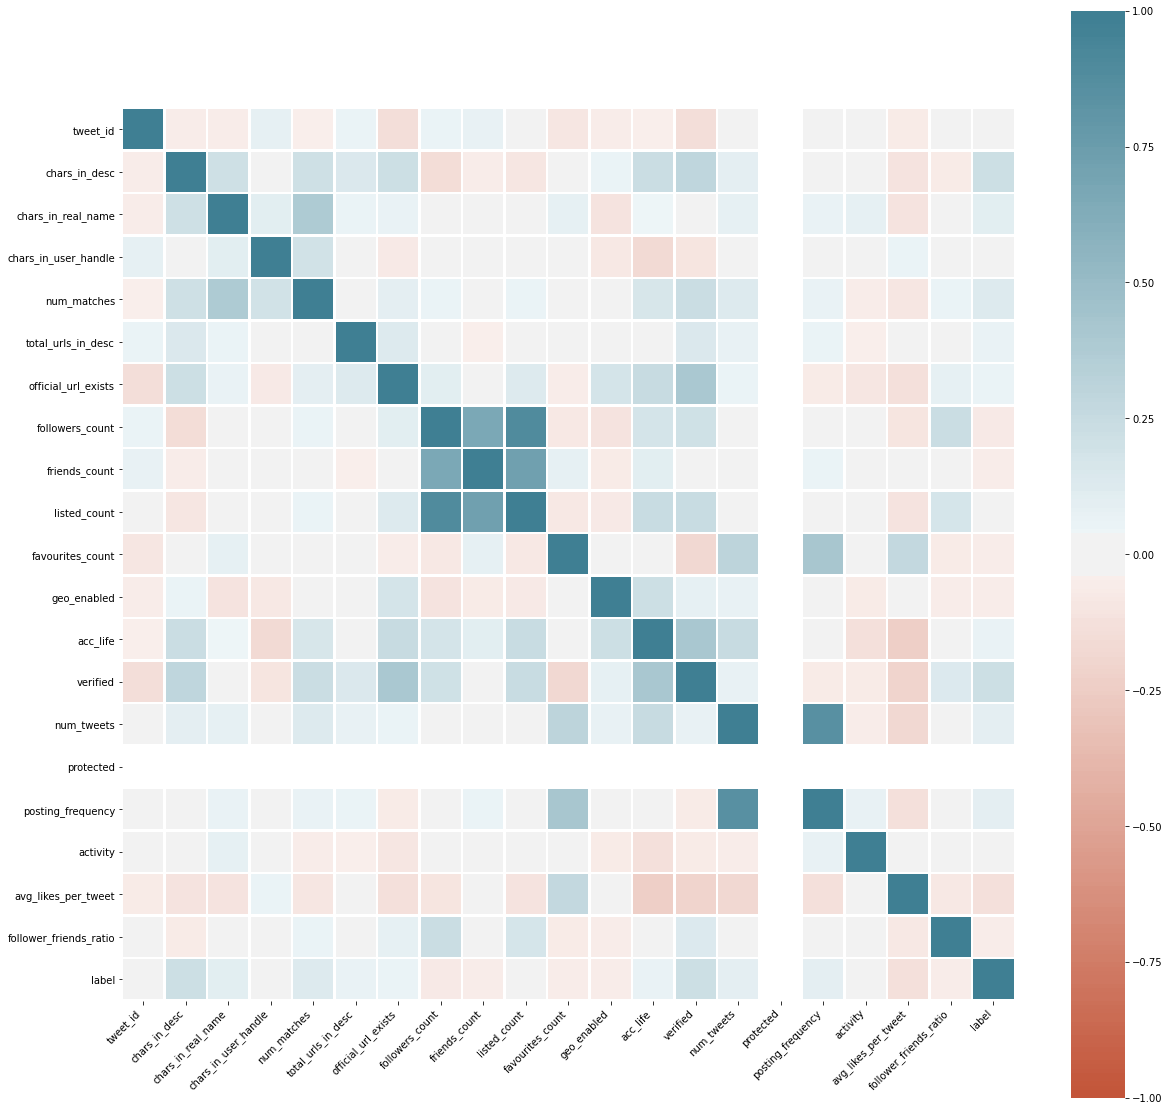

In [120]:
#Correlation Plots
import seaborn as sns

corr = users_df.corr()
fig, ax = plt.subplots(figsize=(20,20))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0, linewidths=1.5,
    cmap=sns.diverging_palette(20, 220, n=200),
    # size = abs(corr),
    ax=ax,
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


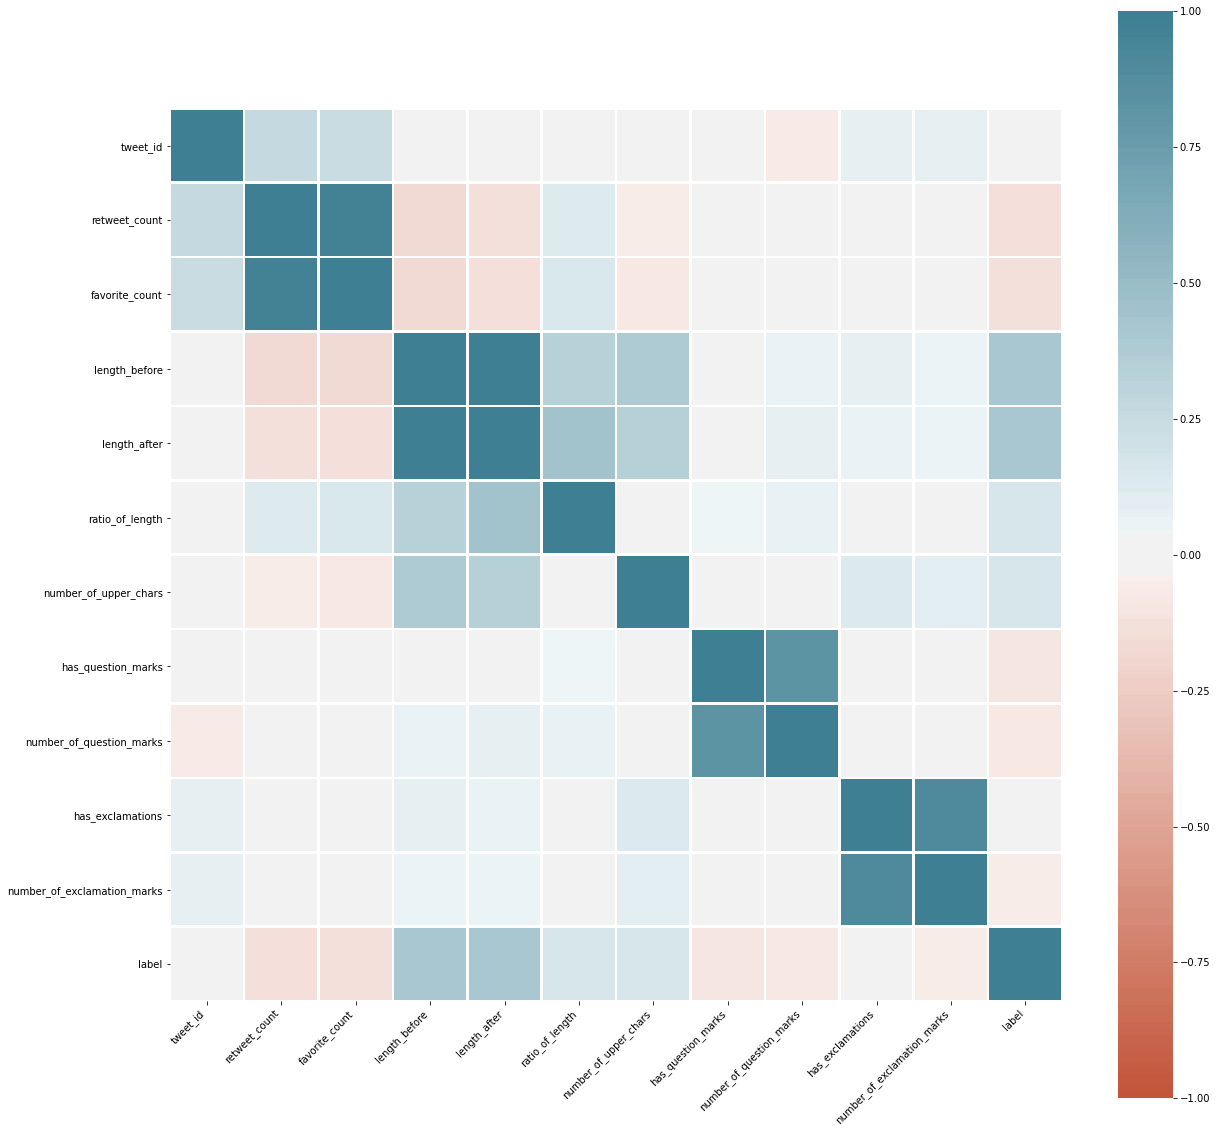

In [50]:
#Correlation Plots
import seaborn as sns

corr = df_en.corr()
fig, ax = plt.subplots(figsize=(20,20))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0, linewidths=1.5,
    cmap=sns.diverging_palette(20, 220, n=200),
    # size = abs(corr),
    ax=ax,
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);



#Extracting Hindi Covid Tweets

In [181]:
a = api.search(q = "#covid",lang='hi', tweet_mode= 'extended', count=100)

hindi_tweets = []
for item in a:
    hindi_tweets.append(item.full_text)
    
df = pd.DataFrame(hindi_tweets,columns = ['hindi_tweets'])
df

,hindi_tweets
0,RT @PeepingMoon: तीन महीने बाद #KasautiiZindag...
1,dilli se kabhie #COVID19 #COVID nahi jane wal...
2,RT @hemantrajora_: बड़ी खबर : Hindu Rao के डॉक...
3,RT @mungale_vijay: @nsitharaman @DasShaktikant...
4,RT @Madhurendra13: आपदा मे जुगाड़ को अस्पताल क...
...,...
95,"RT @Amitjanhit: उत्तर प्रदेश,\nगुजरात\nमध्य प्..."
96,RT @hemantrajora_: बड़ी खबर : Hindu Rao के डॉक...
97,RT @DuraRamBishnoi: #Covid-19 के खिलाफ लड़ाई म...
98,"RT @Amitjanhit: उत्तर प्रदेश,\nगुजरात\nमध्य प्..."


In [184]:
df.to_csv('/gdrive/My Drive/2nd Sem/IBM/Covid Project/Dataset/Processed_Datasets/hinid_covid_tweets.csv')

In [183]:
labels_list = []

counter = 0
for item in df['hindi_tweets']:
    print("\n",item)
    a = input("Real or Fake? <--- Press 1 for real and 0 for fake --->: ")
    labels_list.append(a)

    counter = counter + 1
    if(counter>5):
        break




 RT @PeepingMoon: तीन महीने बाद #KasautiiZindagiiKay2 की शूटिंग हुई री-स्टार्ट,  #Corona के साये के बीच #ParthSamthaan ने की सेट पर वापसी

@…
Real or Fake? <--- Press 1 for real and 0 for fake --->: 1

 dilli se kabhie #COVID19 #COVID  nahi jane wala kyonki yahan bjp aur aap ki politics kabhie nahi khatm hone wali hai....!

#GalwanValley de diya ANPADH BC ne..
Real or Fake? <--- Press 1 for real and 0 for fake --->: 0

 RT @hemantrajora_: बड़ी खबर : Hindu Rao के डॉक्टर हड़ताल पर जाने की तैयारी में। HRH आज से कोविड अस्पताल के रूप में शुरू हो रहा है।  डॉक्टर…
Real or Fake? <--- Press 1 for real and 0 for fake --->: 1

 RT @mungale_vijay: @nsitharaman @DasShaktikanta  क्यों आपकी अंतरात्मा आपको नहीं  झंझोड़ती?#PMCBankCrisis ने जिंदगी तबाह कर दी हमारी।@republ…
Real or Fake? <--- Press 1 for real and 0 for fake --->: 2

 RT @Madhurendra13: आपदा मे जुगाड़ को अस्पताल कहने वाले @AamAadmiParty के स्वास्थ्य मंत्री प्राइवेट हॉस्पिटल में इलाज कराके लौटें है। 
बाबा…
Real or Fake? <--- Press 1 for r

#Extracting Bangla Covid Tweets

In [49]:
a = api.search(q = "#covid",lang='bn', tweet_mode= 'extended', count=100)

bangla_tweets = []
for item in a:
    bangla_tweets.append(item.full_text)
    
df_bangla_tweets = pd.DataFrame(bangla_tweets,columns = ['bangla_tweets'])
df_bangla_tweets

,bangla_tweets
0,করোনায় না’গঞ্জে শেষ ২৪ ঘণ্টায় শনাক্ত ৫৪\nhtt...
1,১০ দিনেই করোনা জয় করে বাসায় ফিরলেন বাণিজ্যমন...
2,"চেয়ারম্যান করোনা আক্রান্ত, নিয়মিত সাক্ষাতে এ..."
3,"হু হু করে বাড়ছে করোনা রোগী, ভরসা পিচবোর্ডের ব..."
4,"একদিনে ১৮ হাজার আক্রান্ত, দেশে কোভিডের কবলে মো..."
...,...
95,আ.লীগের উপ-প্রচার সম্পাদক আমিনের করোনা পজিটিভ\...
96,সিলেট কাস্টমসের সহকারী কমিশনার সস্ত্রীক করোনায...
97,"ভারতে উল্টো চিত্র, পুরুষের চেয়ে নারীর মৃত্যু ..."
98,RT @fhussainAs: কৰ'নাৰ নামত মনিপুৰত বিৰোধী পক্...
